## Requerimientos del analisis exploratorio
* Usuario que mas vota
* Pelicula mejor votada

In [2]:
import pandas as pd

data_path = '/home/eduardo/Descargas/ml-32m/'

ratings = pd.read_csv(data_path + 'ratings.csv', sep=',', nrows=5000)

print(ratings.head())


   userId  movieId  rating  timestamp
0       1       17     4.0  944249077
1       1       25     1.0  944250228
2       1       29     2.0  943230976
3       1       30     5.0  944249077
4       1       32     5.0  943228858


## Descripcion del dataset

In [3]:
# 1. Mostrar información general del dataset
print(ratings.info())
print(ratings.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     5000 non-null   int64  
 1   movieId    5000 non-null   int64  
 2   rating     5000 non-null   float64
 3   timestamp  5000 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 156.4 KB
None
            userId        movieId       rating     timestamp
count  5000.000000    5000.000000  5000.000000  5.000000e+03
mean     20.518000   18574.710800     3.370000  1.151504e+09
std       8.884946   35392.363717     1.048437  2.169594e+08
min       1.000000       1.000000     0.500000  8.364232e+08
25%      12.000000    1356.000000     3.000000  9.615953e+08
50%      27.000000    3671.500000     3.500000  1.084485e+09
75%      28.000000    7880.250000     4.000000  1.251923e+09
max      28.000000  280236.000000     5.000000  1.695408e+09


## Distribucion de calificaciones

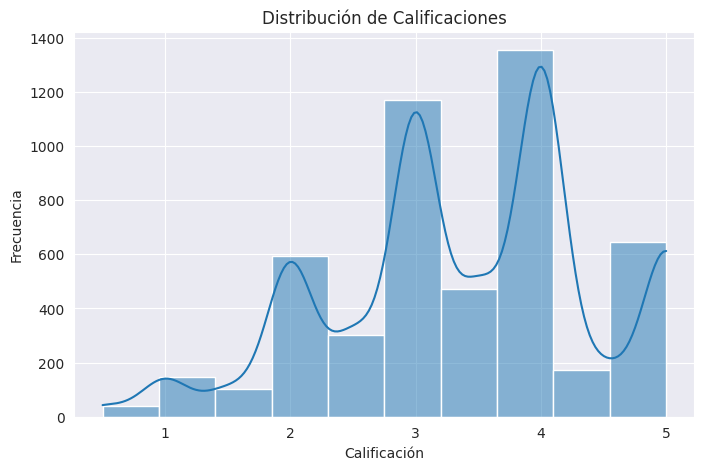

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# 2. Distribución de calificaciones
plt.figure(figsize=(8, 5))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title("Distribución de Calificaciones")
plt.xlabel("Calificación")
plt.ylabel("Frecuencia")
plt.show()

## Numero de calificaciones por usuario

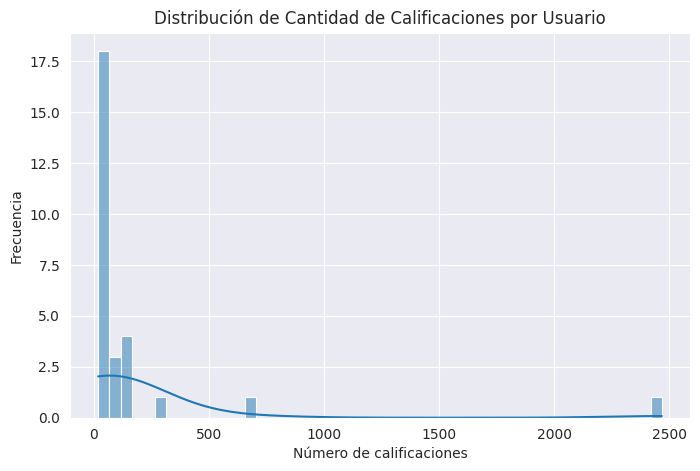

In [5]:
# 3. Número de calificaciones por usuario
user_ratings = ratings.groupby('userId')['rating'].count()
plt.figure(figsize=(8, 5))
sns.histplot(user_ratings, bins=50, kde=True)
plt.title("Distribución de Cantidad de Calificaciones por Usuario")
plt.xlabel("Número de calificaciones")
plt.ylabel("Frecuencia")
plt.show()

## Numero de calificaciones por pelicula

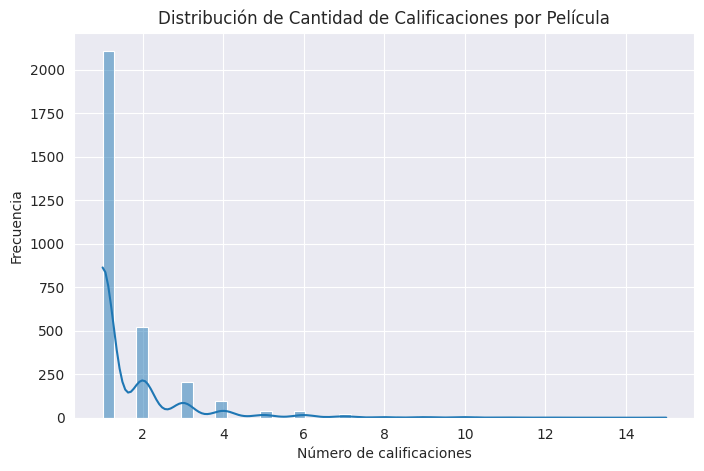

In [6]:
# 4. Número de calificaciones por película
movie_ratings = ratings.groupby('movieId')['rating'].count()
plt.figure(figsize=(8, 5))
sns.histplot(movie_ratings, bins=50, kde=True)
plt.title("Distribución de Cantidad de Calificaciones por Película")
plt.xlabel("Número de calificaciones")
plt.ylabel("Frecuencia")
plt.show()

## Peliculas mas y menos calificadas

In [7]:
# 5. Películas más y menos calificadas
top_movies = movie_ratings.sort_values(ascending=False).head(10)
bottom_movies = movie_ratings.sort_values().head(10)

print("Top 10 películas más calificadas:\n", top_movies)
print("Top 10 películas menos calificadas:\n", bottom_movies)

Top 10 películas más calificadas:
 movieId
318     15
296     13
260     12
356     12
2858    11
593     11
527     11
2571    10
4226    10
588     10
Name: rating, dtype: int64
Top 10 películas menos calificadas:
 movieId
4867    1
4777    1
4900    1
4899    1
4898    1
4889    1
4888    1
4887    1
4876    1
4873    1
Name: rating, dtype: int64


### Usuario que mas vota

In [12]:
top_user = ratings['userId'].value_counts().idxmax()
top_user_max = ratings['userId'].value_counts().max()
print("EL usuario que mas vota es ", top_user, "con", top_user_max, "votos")


EL usuario que mas vota es  28 con 2468 votos


### Pelicula con mas calificaciones

In [18]:
movies = pd.read_csv(data_path + 'movies.csv', sep=',', nrows=5000)
most_voted_movie = ratings['movieId'].value_counts().idxmax()
most_voted_user_max = ratings['movieId'].value_counts().max()
most_voted_movie_name = movies.loc[movies['movieId'] == most_voted_movie]['title'].values[0]
print("Pelicula mas votada", most_voted_movie_name, "con", most_voted_user_max, "votos")

Pelicula mas votada Shawshank Redemption, The (1994) con 15 votos


### Calificacion promedio por pelicula

In [15]:
movie_avg_ratings = ratings.groupby('movieId')['rating'].mean()
top_movie_votes = ratings['movieId'].value_counts().idxmax()
print("Promedio", movie_avg_ratings)
print("Promedio", top_movie_votes)

Promedio movieId
1         3.562500
2         2.833333
3         3.500000
5         2.500000
6         3.750000
            ...   
247150    3.000000
250010    5.000000
278420    4.000000
279412    3.500000
280236    4.000000
Name: rating, Length: 3056, dtype: float64
Promedio 318


### Analisis con nombres